In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest

pd.set_option("display.max_columns", 200)
np.random.seed(16481003)

In [2]:
df = pd.read_csv("ffiec.csv")
df.head(3)

,IDRSSD,quarter,RCON0010_qoq,RCON0020_qoq,RCON0080_qoq,RCON0090_qoq,RCON0352_qoq,RCON1420_qoq,RCON1460_qoq,RCON1545_qoq,RCON1590_qoq,RCON1763_qoq,RCON1764_qoq,RCON1797_qoq,RCON2107_qoq,RCON2122_qoq,RCON2123_qoq,RCON2165_qoq,RCON2200_qoq,RCON2202_qoq,RCON2203_qoq,RCON2210_qoq,RCON2213_qoq,RCON2215_qoq,RCON2216_qoq,RCON2236_qoq,RCON2365_qoq,RCON2377_qoq,RCON2385_qoq,RCON2520_qoq,RCON2530_qoq,RCON3360_qoq,RCON3386_qoq,RCON3387_qoq,RCON3485_qoq,RCON3493_qoq,RCON3494_qoq,RCON3495_qoq,RCON3499_qoq,RCON3500_qoq,RCON3501_qoq,RCON5367_qoq,RCON5368_qoq,RCON5370_qoq,RCON5398_qoq,RCON5399_qoq,RCON5400_qoq,RCON5508_qoq,RCON5509_qoq,RCON5510_qoq,RCON5511_qoq,RCON5512_qoq,RCON5597_qoq,RCON6631_qoq,RCON6636_qoq,RCON6648_qoq,RCON6810_qoq,RCON6835_qoq,RCON9999_qoq,RCONA564_qoq,RCONA565_qoq,RCONA566_qoq,RCONA567_qoq,RCONA568_qoq,RCONA569_qoq,RCONB534_qoq,RCONB538_qoq,RCONB539_qoq,RCONB549_qoq,RCONB550_qoq,RCONB551_qoq,RCONB552_qoq,RCONB561_qoq,RCONB562_qoq,RCONB563_qoq,RIAD0093_qoq,RIAD3123_qoq,RIAD3196_qoq,RIAD3210_qoq,RIAD3217_qoq,RIAD3521_qoq,RIAD3584_qoq,RIAD3585_qoq,RIAD3588_qoq,RIAD3589_qoq,RIAD4010_qoq,RIAD4012_qoq,RIAD4020_qoq,RIAD4024_qoq,RIAD4060_qoq,RIAD4065_qoq,RIAD4070_qoq,RIAD4073_qoq,RIAD4074_qoq,RIAD4079_qoq,RIAD4080_qoq,RIAD4092_qoq,RIAD4093_qoq,RIAD4107_qoq,RIAD4115_qoq,RIAD4135_qoq,RIAD4150_qoq,RIAD4180_qoq,RIAD4185_qoq,RIAD4200_qoq,RIAD4217_qoq,RIAD4230_qoq,RIAD4300_qoq,RIAD4301_qoq,RIAD4302_qoq,RIAD4313_qoq,RIAD4340_qoq,RIAD4356_qoq,RIAD4415_qoq,RIAD4460_qoq,RIAD4470_qoq,RIAD4507_qoq,RIAD4508_qoq,RIAD4513_qoq,RIAD4518_qoq,RIAD4605_qoq,RIAD4618_qoq,RIAD4628_qoq,RIAD4635_qoq,RIAD4644_qoq,RIAD4646_qoq,RIAD4652_qoq,RIAD4655_qoq,RIAD4662_qoq,RIAD4665_qoq,RIAD5409_qoq,RIAD5410_qoq,RIAD5411_qoq,RIAD5412_qoq,RIAD5415_qoq,RIAD5416_qoq,RIAD8431_qoq,RIAD8757_qoq,RIAD8758_qoq,RIAD8759_qoq,RIAD8760_qoq,RIADA220_qoq,RIADA251_qoq,RIADB485_qoq,RIADB486_qoq,RIADB488_qoq,RIADB489_qoq,RIADB491_qoq,RIADB492_qoq,RIADB493_qoq,RIADB496_qoq,RIADB497_qoq,RIADB507_qoq,RIADB508_qoq,RIADB509_qoq,RIADB511_qoq,RIADB514_qoq,RIADB515_qoq,RIADB522_qoq
0,451965,3/31/2002,-1.625823,0.560538,-18.271955,-47.692308,17.665109,1.806240,11.295681,85.901639,6.570743,2.845451,-79.824561,89.144883,2.290076,21.491026,NaN,-18.148906,11.810797,20.000000,14.141414,8.044144,NaN,7.636923,NaN,NaN,NaN,NaN,13.086239,NaN,-27.272727,38.230929,8.411215,4.044944,24.497992,-66.666667,-66.666667,500.000000,425.00000,NaN,-20.000000,75.482929,-44.793850,981.037277,-24.324324,-66.666667,0.000000,NaN,NaN,-18.181818,-100.0,-13.513514,NaN,1.406074,17.626190,-31.420861,12.775842,-13.145540,0.049973,30.017435,-84.390609,-79.711538,803.300705,809.273308,-2.586207,NaN,966.666667,23.866348,7.716205,13.169895,5.741388,NaN,900.000000,42.547638,17.417065,-55.747126,-4.651163,-89.130435,14.547811,17.819188,NaN,NaN,NaN,NaN,NaN,3.066202,-11.250000,-98.948728,-40.909091,-4.347826,-8.620690,-12.676056,-50.982962,35.528942,-45.424054,8.000000,-12.323944,1.451279,-1.869688,-58.139535,25.082508,10.937112,-53.048780,-36.923077,-48.809524,10.179641,7.142857,-53.401899,-41.147132,4.411765,0.0,-56.408228,NaN,-100.0,-100.0,NaN,0.0,-62.500000,0.0,0.0,41.666667,NaN,NaN,25.454545,-63.636364,-100.0,NaN,-80.000000,NaN,-100.0,NaN,NaN,0.0,NaN,-400.0,-3972.614286,-70.625000,-36.363636,28.571429,NaN,NaN,-6.557377,NaN,NaN,10.975610,-20.0,-23.148148,NaN,50.931677,NaN,-108.160622,11.075949,NaN,17.819188,NaN,-55.384615,NaN,NaN,-4.114134
1,451965,3/31/2003,-29.071267,4.252269,-17.157712,-14.705882,54.150451,-9.838710,17.313433,-36.155203,6.120612,6.431017,-39.130435,318.575779,79.850746,63.158670,NaN,-20.500000,36.178956,-16.666667,-60.619469,-52.535868,NaN,-49.562632,NaN,NaN,446.308571,NaN,61.117116,NaN,660.000000,52.076444,7.801724,4.131244,19.193548,225.000000,100.000000,-8.333333,-90.47619,NaN,-16.666667,120.800000,142.468354,66.844078,110.714286,241.583333,57.142857,NaN,NaN,22.222222,NaN,-68.750000,92.332993,15.585136,46.102012,-9.136014,23.059639,-2.822823,0.049949,210.981152,-82.880000,572.037915,220.945320,25.37868

In [3]:
df.dtypes.value_counts()

float64    157
int64        1
object       1
Name: count, dtype: int64

In [4]:
non_feature_cols = ["IDRSSD", "quarter"]
X = df.drop(columns=non_feature_cols)
X.shape

(557, 157)

In [5]:
# sanity check: all numeric? / Empty index?
X.select_dtypes(exclude=["number"]).columns
print(f"Feature matrix shape: {X.shape}")
print(f"Number of unique banks: {df['IDRSSD'].nunique()}")

Feature matrix shape: (557, 157)
Number of unique banks: 6


In [6]:
# Cell 4: Analyze data availability per bank
bank_counts = df.groupby('IDRSSD').size().sort_values(ascending=False)
print("\nData availability per bank:")
print(f"Banks with ≥20 quarters: {(bank_counts >= 20).sum()}")
print(f"Banks with <20 quarters: {(bank_counts < 20).sum()}")
print("\nTop 10 banks by number of quarters:")
print(bank_counts.head(10))


Data availability per bank:
Banks with ≥20 quarters: 6
Banks with <20 quarters: 0

Top 10 banks by number of quarters:
IDRSSD
451965     98
476810     98
480228     98
852218     98
1456501    98
2182786    67
dtype: int64


In [7]:
# Cell 5: Bank-Specific Isolation Forest Models
MIN_QUARTERS = 20  # Minimum quarters required to train a bank-specific model
TEST_SIZE = 0.25
CONTAMINATION = 0.05  # Expected proportion of anomalies

# Storage for results
all_results = []
bank_models = {}  # Store models for later analysis
banks_processed = 0
banks_skipped = 0

print("Training bank-specific Isolation Forest models...\n")

for bank_id in df['IDRSSD'].unique():
    # Filter data for this bank
    bank_data = df[df['IDRSSD'] == bank_id].copy()
    
    # Check if sufficient data exists
    if len(bank_data) < MIN_QUARTERS:
        banks_skipped += 1
        print(f"Skipping bank {bank_id}: Only {len(bank_data)} quarters (need ≥{MIN_QUARTERS})")
        continue
    
    banks_processed += 1
    print(f"Processing bank {bank_id}: {len(bank_data)} quarters")
    
    # Create feature matrix for this bank
    X_bank = bank_data.drop(['IDRSSD', 'quarter'], axis=1)
    
    # Train/test split
    X_train, X_test = train_test_split(
        X_bank, 
        test_size=TEST_SIZE, 
        random_state=42
    )
    
    # Create preprocessing pipeline
    preprocess = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])
    
    # Fit preprocessing on training data
    X_train_p = preprocess.fit_transform(X_train)
    X_test_p = preprocess.transform(X_test)
    
    # Train Isolation Forest
    iso = IsolationForest(
        contamination=CONTAMINATION,
        random_state=16481003,
        n_estimators=100
    )
    iso.fit(X_train_p)
    
    # Score test set
    test_scores = iso.score_samples(X_test_p)
    test_anom_score = -test_scores  # Higher = more anomalous
    test_pred = (iso.predict(X_test_p) == -1).astype(int)
    
    # Create results for this bank
    bank_results = bank_data.loc[X_test.index, ['IDRSSD', 'quarter']].copy()
    bank_results['anom_score'] = test_anom_score
    bank_results['is_anomaly'] = test_pred
    bank_results['model_type'] = 'bank_specific'
    
    all_results.append(bank_results)
    
    # Store model and preprocessing pipeline for later use
    bank_models[bank_id] = {
        'model': iso,
        'preprocessor': preprocess,
        'n_train': len(X_train),
        'n_test': len(X_test)
    }

print(f"\n=== Summary ===")
print(f"Banks processed: {banks_processed}")
print(f"Banks skipped (insufficient data): {banks_skipped}")

Training bank-specific Isolation Forest models...

Processing bank 451965: 98 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD3521_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD3521_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Processing bank 476810: 98 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON3494_qoq' 'RCON5509_qoq' 'RIAD3584_qoq' 'RIAD3585_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON3494_qoq' 'RCON5509_qoq' 'RIAD3584_qoq' 'RIAD3585_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Processing bank 480228: 98 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Processing bank 852218: 98 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RCON5509_qoq' 'RIAD3521_qoq' 'RIAD4470_qoq'
 'RIADB509_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RCON5509_qoq' 'RIAD3521_qoq' 'RIAD4470_qoq'
 'RIADB509_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Processing bank 1456501: 98 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON0020_qoq' 'RCON1420_qoq' 'RCON1590_qoq' 'RCON2123_qoq'
 'RCON2165_qoq' 'RCON2202_qoq' 'RCON2203_qoq' 'RCON2213_qoq'
 'RCON2216_qoq' 'RCON2236_qoq' 'RCON2377_qoq' 'RCON2520_qoq'
 'RCON2530_qoq' 'RCON3386_qoq' 'RCON3493_qoq' 'RCON3494_qoq'
 'RCON3495_qoq' 'RCON3499_qoq' 'RCON3500_qoq' 'RCON5398_qoq'
 'RCON5399_qoq' 'RCON5400_qoq' 'RCON5508_qoq' 'RCON5509_qoq'
 'RCON5511_qoq' 'RCON5512_qoq' 'RCONA567_qoq' 'RCONB538_qoq'
 'RCONB551_qoq' 'RCONB552_qoq' 'RCONB561_qoq' 'RIAD3584_qoq'
 'RIAD3585_qoq' 'RIAD3588_qoq' 'RIAD3589_qoq' 'RIAD4024_qoq'
 'RIAD4065_qoq' 'RIAD4070_qoq' 'RIAD4356_qoq' 'RIAD4470_qoq'
 'RIAD4513_qoq' 'RIAD4618_qoq' 'RIAD4655_qoq' 'RIAD4662_qoq'
 'RIAD4665_qoq' 'RIAD5410_qoq' 'RIAD5411_qoq' 'RIAD5412_qoq'
 'RIAD5415_qoq' 'RIAD8431_qoq' 'RIAD8760_qoq' 'RIADA251_qoq'
 'RIADB491_qoq' 'RIADB493_qoq' 'RIADB509_qoq']. At least one non-missing value is neede

Processing bank 2182786: 67 quarters


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON0080_qoq' 'RCON2123_qoq' 'RCON2165_qoq' 'RCON3493_qoq'
 'RCON3494_qoq' 'RCON5399_qoq' 'RCON5509_qoq' 'RCON5511_qoq'
 'RCONB539_qoq' 'RIAD3584_qoq' 'RIAD3585_qoq' 'RIAD3589_qoq'
 'RIAD4065_qoq' 'RIAD4080_qoq' 'RIAD4313_qoq' 'RIAD4470_qoq'
 'RIAD4507_qoq' 'RIAD4513_qoq' 'RIAD4652_qoq' 'RIAD4655_qoq'
 'RIAD4662_qoq' 'RIAD4665_qoq' 'RIAD5409_qoq' 'RIAD5410_qoq'
 'RIAD5411_qoq' 'RIAD5412_qoq' 'RIADA251_qoq' 'RIADB491_qoq'
 'RIADB493_qoq' 'RIADB496_qoq' 'RIADB509_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON0080_qoq' 'RCON2123_qoq' 'RCON2165_qoq' 'RCON3493_qoq'
 'RCON3494_qoq' 'RCON5399_qoq' 'RCON5509_qoq' 'RCON5511_qoq'
 'RCONB539_qoq' 'RIAD3584_qoq' 'RIAD3585_qoq' 'RIAD3589_qoq'
 'RIA


=== Summary ===
Banks processed: 6
Banks skipped (insufficient data): 0


In [8]:
# Cell 6: Combine results
results = pd.concat(all_results, ignore_index=True)

print(f"Total test observations across all banks: {len(results)}")
print(f"Total anomalies detected: {results['is_anomaly'].sum()}")
print(f"Anomaly rate: {results['is_anomaly'].mean():.2%}")

print("\nTop 20 anomalies across all banks:")
results.sort_values('anom_score', ascending=False).head(20)

Total test observations across all banks: 142
Total anomalies detected: 9
Anomaly rate: 6.34%

Top 20 anomalies across all banks:


,IDRSSD,quarter,anom_score,is_anomaly,model_type
70,480228,9/30/2001,0.632533,1,bank_specific
20,451965,9/30/2001,0.588336,1,bank_specific
95,852218,9/30/2001,0.583525,1,bank_specific
45,476810,9/30/2001,0.575014,1,bank_specific
126,2182786,6/30/2009,0.557583,1,bank_specific
120,1456501,9/30/2001,0.527695,1,bank_specific
34,476810,3/31/2002,0.520123,1,bank_specific
65,480228,3/31/2006,0.520016,1,bank_specific
79,852218,12/31/2008,0.510140,0,bank_specific
115,1456501,3/31/2006,0.507898,1,bank_specific


In [9]:
# Cell 7: Analysis by bank
bank_summary = results.groupby('IDRSSD').agg({
    'anom_score': ['count', 'mean', 'max'],
    'is_anomaly': 'sum'
}).round(3)

bank_summary.columns = ['n_test_obs', 'avg_anom_score', 'max_anom_score', 'n_anomalies']
bank_summary['anomaly_rate'] = (bank_summary['n_anomalies'] / bank_summary['n_test_obs'] * 100).round(2)

print("Anomaly summary by bank:")
bank_summary.sort_values('max_anom_score', ascending=False)

Anomaly summary by bank:


,n_test_obs,avg_anom_score,max_anom_score,n_anomalies,anomaly_rate
IDRSSD,,,,,
480228,25,0.385,0.633,2,8.00
451965,25,0.381,0.588,1,4.00
852218,25,0.390,0.584,1,4.00
476810,25,0.384,0.575,2,8.00
2182786,17,0.406,0.558,1,5.88
1456501,25,0.401,0.528,2,8.00


In [10]:
# Cell 8: Deep dive into specific bank
BANK_TO_EXAMINE = results.loc[results['anom_score'].idxmax(), 'IDRSSD']

bank_anomalies = results[results['IDRSSD'] == BANK_TO_EXAMINE].sort_values('anom_score', ascending=False)

print(f"\n=== Anomalies for Bank {BANK_TO_EXAMINE} ===")
print(f"Total observations: {len(bank_anomalies)}")
print(f"Anomalies detected: {bank_anomalies['is_anomaly'].sum()}")
print(f"\nTop 10 most anomalous quarters:")
bank_anomalies.head(10)


=== Anomalies for Bank 480228 ===
Total observations: 25
Anomalies detected: 2

Top 10 most anomalous quarters:


,IDRSSD,quarter,anom_score,is_anomaly,model_type
70,480228,9/30/2001,0.632533,1,bank_specific
65,480228,3/31/2006,0.520016,1,bank_specific
54,480228,12/31/2008,0.467431,0,bank_specific
60,480228,6/30/2008,0.419378,0,bank_specific
52,480228,12/31/2021,0.412577,0,bank_specific
64,480228,6/30/2021,0.388002,0,bank_specific
72,480228,9/30/2020,0.385320,0,bank_specific
59,480228,3/31/2002,0.385137,0,bank_specific
71,480228,9/30/2022,0.379604,0,bank_specific
63,480228,6/30/2003,0.379534,0,bank_specific


In [11]:
# Cell 9: Feature importance analysis function
def analyze_anomaly_features(bank_id, quarter, df, bank_models, top_n=20):
    """
    Show which features are most extreme for a given anomalous observation
    """
    # Get the observation
    obs = df[(df['IDRSSD'] == bank_id) & (df['quarter'] == quarter)]
    
    if len(obs) == 0:
        print(f"No data found for bank {bank_id}, quarter {quarter}")
        return
    
    if bank_id not in bank_models:
        print(f"No model found for bank {bank_id}")
        return
    
    # Get features
    X_obs = obs.drop(['IDRSSD', 'quarter'], axis=1)
    
    # Transform using bank's preprocessor
    preprocessor = bank_models[bank_id]['preprocessor']
    X_obs_p = preprocessor.transform(X_obs)
    
    # Get feature names from the preprocessor (handles dropped columns)
    # The StandardScaler stores the feature names after fitting
    try:
        # Try to get feature names from the pipeline
        feature_names_out = preprocessor.get_feature_names_out()
        # Remove the step prefixes like 'scale__' if present
        feature_names = [name.split('__')[-1] for name in feature_names_out]
    except:
        # Fallback: use the columns that have non-zero variance after preprocessing
        # This handles cases where some columns were all NaN for this bank
        feature_mask = ~np.all(np.isnan(preprocessor.named_steps['impute'].transform(X_obs)), axis=0)
        feature_names = X_obs.columns[feature_mask].tolist()
    
    # Create z-scores (standardized values)
    z_scores = pd.Series(
        X_obs_p.ravel(),
        index=feature_names
    )
    
    # Rank by absolute z-score
    z_abs = z_scores.abs().sort_values(ascending=False)

    # Get raw values for the features that were kept
    raw_values = []
    for feat in z_abs.index[:top_n]:
        if feat in X_obs.columns:
            raw_values.append(X_obs.iloc[0][feat])
        else:
            raw_values.append(np.nan)

    # Create summary
    feature_analysis = pd.DataFrame({
        'feature': z_abs.index[:top_n],
        'raw_value': X_obs.iloc[0][z_abs.index[:top_n]].values,
        'z_score': z_scores[z_abs.index[:top_n]].values,
        'abs_z': z_abs.head(top_n).values
    }).set_index('feature')
    
    print(f"\n=== Feature Analysis: Bank {bank_id}, Quarter {quarter} ===")
    print(f"\nTop {top_n} most extreme features (by |z-score|):")
    print(feature_analysis.round(3))
    
    return feature_analysis

# Example: Analyze the top anomaly
top_anomaly = results.loc[results['anom_score'].idxmax()]
analyze_anomaly_features(
    bank_id=top_anomaly['IDRSSD'],
    quarter=top_anomaly['quarter'],
    df=df,
    bank_models=bank_models
)


=== Feature Analysis: Bank 480228, Quarter 9/30/2001 ===

Top 20 most extreme features (by |z-score|):
              raw_value  z_score  abs_z
feature                                
RCONB534_qoq  14808.333    6.744  6.744
RIAD4200_qoq   1374.208    6.040  6.040
RCON9999_qoq     -1.184   -5.958  5.958
RIAD4618_qoq   2523.000    5.710  5.710
RIADB485_qoq   -100.000   -5.633  5.633
RCON6636_qoq    -84.536   -5.304  5.304
RCON2200_qoq    -83.969   -5.111  5.111
RIAD8431_qoq   1284.960    5.083  5.083
RCONB550_qoq    -83.815   -5.048  5.048
RIADB491_qoq   3403.000    5.039  5.039
RCON2520_qoq  23983.375    4.997  4.997
RCON2385_qoq    -83.278   -4.995  4.995
RCONB563_qoq    -87.095   -4.851  4.851
RCON2202_qoq    568.750    4.794  4.794
RCON3360_qoq    -68.643   -4.696  4.696
RCON2122_qoq    -68.613   -4.647  4.647
RCON0020_qoq    137.775    4.642  4.642
RCON2215_qoq    -86.432   -4.629  4.629
RCONB549_qoq    -86.148   -4.607  4.607
RCONB539_qoq    506.098    4.429  4.429


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,raw_value,z_score,abs_z
feature,,,
RCONB534_qoq,14808.333330,6.744428,6.744428
RIAD4200_qoq,1374.208145,6.039527,6.039527
RCON9999_qoq,-1.183667,-5.958241,5.958241
RIAD4618_qoq,2523.000000,5.710402,5.710402
RIADB485_qoq,-100.000000,-5.633265,5.633265
RCON6636_qoq,-84.536177,-5.303584,5.303584
RCON2200_qoq,-83.969420,-5.110691,5.110691
RIAD8431_qoq,1284.960000,5.082575,5.082575
RCONB550_qoq,-83.815365,-5.047973,5.047973


In [12]:
# Cell 14: Bank name dictionary and display results with bank names

# Bank ID to name mapping
bank_names = {
    451965: "Wells Fargo Bank",
    476810: "Citibank",
    480228: "Bank of America",
    852218: "JPMorgan Chase Bank",
    1456501: "Morgan Stanley Bank",
    2182786: "Goldman Sachs Bank USA"
}

# Add bank names to results dataframe
results['bank_name'] = results['IDRSSD'].map(bank_names)

# Display top anomalies for each bank
print("="*80)
print("TOP ANOMALIES BY BANK")
print("="*80)

for bank_id in sorted(results['IDRSSD'].unique()):
    bank_data = results[results['IDRSSD'] == bank_id].sort_values('anom_score', ascending=False)
    bank_name = bank_names[bank_id]
    
    print(f"\n{'='*80}")
    print(f"{bank_name} (IDRSSD: {bank_id})")
    print(f"{'='*80}")
    print(bank_data[['bank_name', 'quarter', 'anom_score', 'is_anomaly']].head(5).to_string(index=False))

TOP ANOMALIES BY BANK

Wells Fargo Bank (IDRSSD: 451965)
       bank_name    quarter  anom_score  is_anomaly
Wells Fargo Bank  9/30/2001    0.588336           1
Wells Fargo Bank 12/31/2010    0.501757           0
Wells Fargo Bank  6/30/2021    0.436926           0
Wells Fargo Bank  6/30/2003    0.411120           0
Wells Fargo Bank 12/31/2021    0.390676           0

Citibank (IDRSSD: 476810)
bank_name    quarter  anom_score  is_anomaly
 Citibank  9/30/2001    0.575014           1
 Citibank  3/31/2002    0.520123           1
 Citibank 12/31/2002    0.467912           0
 Citibank  9/30/2022    0.422624           0
 Citibank  6/30/2021    0.412495           0

Bank of America (IDRSSD: 480228)
      bank_name    quarter  anom_score  is_anomaly
Bank of America  9/30/2001    0.632533           1
Bank of America  3/31/2006    0.520016           1
Bank of America 12/31/2008    0.467431           0
Bank of America  6/30/2008    0.419378           0
Bank of America 12/31/2021    0.412577       

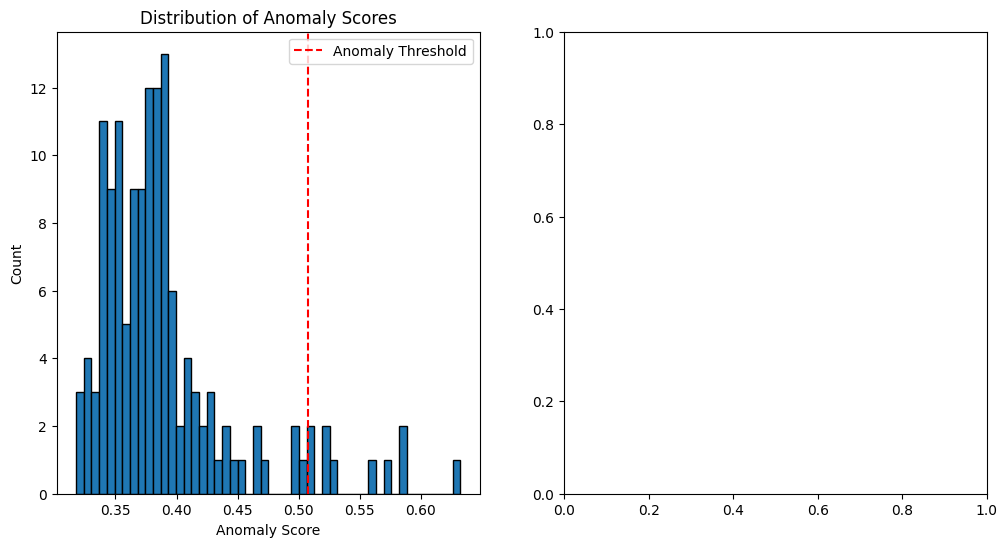

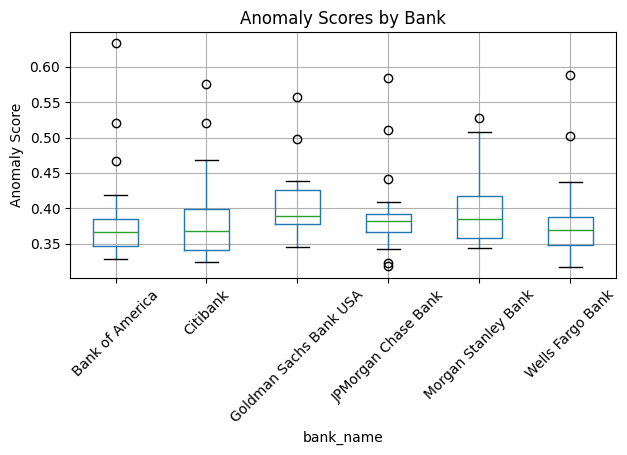

Anomaly Score Statistics:
Mean: 0.3906
Median: 0.3782
Threshold for is_anomaly=1: 0.5079

Anomalies detected: 9 out of 142 (6.3%)


In [13]:
#================================================================================
#    TEST 1:
#================================================================================


# Cell: Verify anomaly score distribution
import matplotlib.pyplot as plt

# Look at the distribution of scores
plt.figure(figsize=(12, 6))

# Histogram of all anomaly scores
plt.subplot(1, 2, 1)
plt.hist(results['anom_score'], bins=50, edgecolor='black')
plt.axvline(results[results['is_anomaly']==1]['anom_score'].min(), color='red', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Distribution of Anomaly Scores')
plt.legend()

# Boxplot by bank
plt.subplot(1, 2, 2)
results.boxplot(column='anom_score', by='bank_name', rot=45)
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores by Bank')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Summary statistics
print("Anomaly Score Statistics:")
print(f"Mean: {results['anom_score'].mean():.4f}")
print(f"Median: {results['anom_score'].median():.4f}")
print(f"Threshold for is_anomaly=1: {results[results['is_anomaly']==1]['anom_score'].min():.4f}")
print(f"\nAnomalies detected: {results['is_anomaly'].sum()} out of {len(results)} ({results['is_anomaly'].mean():.1%})")

In [14]:
#================================================================================
#    TEST 2:
#================================================================================


# Cell: Check if anomalies align with known events

# Look at temporal patterns
anomalies_by_quarter = results[results['is_anomaly']==1].groupby('quarter').size().sort_values(ascending=False)

print("Quarters with Most Anomalies Across All Banks:")
print(anomalies_by_quarter.head(10))

# Check if 9/30/2001 (post-9/11) appears frequently
print(f"\nNumber of banks with anomalies in 9/30/2001: {results[(results['quarter']=='9/30/2001') & (results['is_anomaly']==1)].shape[0]}")
print(f"Number of banks with anomalies in 2008-2009 (financial crisis): {results[(results['quarter'].str.contains('2008|2009')) & (results['is_anomaly']==1)].shape[0]}")

Quarters with Most Anomalies Across All Banks:
quarter
9/30/2001    5
3/31/2006    2
3/31/2002    1
6/30/2009    1
dtype: int64

Number of banks with anomalies in 9/30/2001: 5
Number of banks with anomalies in 2008-2009 (financial crisis): 1


In [15]:
#================================================================================
#    TEST 3:
#================================================================================


# Cell: Analyze features driving the top anomalies

# For the #1 anomaly (Bank of America, 9/30/2001)
print("="*80)
print("DEEP DIVE: Why was Bank of America 9/30/2001 flagged?")
print("="*80)

top_anom = results.loc[results['anom_score'].idxmax()]
feature_analysis = analyze_anomaly_features(
    bank_id=top_anom['IDRSSD'],
    quarter=top_anom['quarter'],
    df=df,
    bank_models=bank_models,
    top_n=10  # Just top 10 features
)

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print("Z-scores > 3.0 = extremely unusual (99.7% of data is within ±3 standard deviations)")
print("Z-scores > 6.0 = virtually impossible by chance")
print("\nIf you see z-scores of 5-7, these are REAL anomalies, not random ranking.")

DEEP DIVE: Why was Bank of America 9/30/2001 flagged?

=== Feature Analysis: Bank 480228, Quarter 9/30/2001 ===

Top 10 most extreme features (by |z-score|):
              raw_value  z_score  abs_z
feature                                
RCONB534_qoq  14808.333    6.744  6.744
RIAD4200_qoq   1374.208    6.040  6.040
RCON9999_qoq     -1.184   -5.958  5.958
RIAD4618_qoq   2523.000    5.710  5.710
RIADB485_qoq   -100.000   -5.633  5.633
RCON6636_qoq    -84.536   -5.304  5.304
RCON2200_qoq    -83.969   -5.111  5.111
RIAD8431_qoq   1284.960    5.083  5.083
RCONB550_qoq    -83.815   -5.048  5.048
RIADB491_qoq   3403.000    5.039  5.039

INTERPRETATION:
Z-scores > 3.0 = extremely unusual (99.7% of data is within ±3 standard deviations)
Z-scores > 6.0 = virtually impossible by chance

If you see z-scores of 5-7, these are REAL anomalies, not random ranking.


C:\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['RCON2123_qoq' 'RIAD4470_qoq']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [16]:
#================================================================================
#    TEST 4:
#================================================================================



# Cell: Sanity check - compare to random labeling

# What if we randomly assigned anomalies?
np.random.seed(42)
results['random_anomaly'] = np.random.choice([0, 1], size=len(results), p=[0.95, 0.05])

print("Model-detected anomalies vs Random anomalies:")
print(f"\nModel flags 9/30/2001 for {results[(results['quarter']=='9/30/2001') & (results['is_anomaly']==1)].shape[0]} banks")
print(f"Random flags 9/30/2001 for {results[(results['quarter']=='9/30/2001') & (results['random_anomaly']==1)].shape[0]} banks")

print(f"\nModel avg anomaly score: {results[results['is_anomaly']==1]['anom_score'].mean():.4f}")
print(f"Random avg anomaly score: {results[results['random_anomaly']==1]['anom_score'].mean():.4f}")

Model-detected anomalies vs Random anomalies:

Model flags 9/30/2001 for 5 banks
Random flags 9/30/2001 for 0 banks

Model avg anomaly score: 0.5570
Random avg anomaly score: 0.3987


In [22]:
# Cell: Does Bank of America's 9/30/2001 anomaly make sense?

# Look at the actual feature values
boa_2001 = df[(df['IDRSSD']==480228) & (df['quarter']=='9/30/2001')]
boa_normal = df[(df['IDRSSD']==480228) & (df['quarter']!='9/30/2001')]

# Compare the flagged quarter to normal quarters
print("Bank of America - 9/30/2001 vs Normal Quarters")
print("="*80)

# Pick a few key features to compare
key_features = ['RCONB534_qoq', 'RIAD4200_qoq', 'RCON9999_qoq']  # From your feature analysis

for feat in key_features:
    if feat in boa_2001.columns:
        val_2001 = boa_2001[feat].values[0]
        mean_normal = boa_normal[feat].mean()
        std_normal = boa_normal[feat].std()
        
        print(f"\n{feat}:")
        print(f"  Value in 9/30/2001: {val_2001:.2f}")
        print(f"  Normal average: {mean_normal:.2f}")
        print(f"  Normal std dev: {std_normal:.2f}")
        print(f"  How many std devs away: {abs(val_2001 - mean_normal) / std_normal:.2f}")

#Run **Test 3** (the z-score analysis) on your existing Cell 12 output. You already have this data:
#RCONB534_qoq  z_score: 6.744
#RIAD4200_qoq  z_score: 6.040
#RCON9999_qoq  z_score: -5.958

Bank of America - 9/30/2001 vs Normal Quarters

RCONB534_qoq:
  Value in 9/30/2001: 14808.33
  Normal average: 624.08
  Normal std dev: 2829.24
  How many std devs away: 5.01

RIAD4200_qoq:
  Value in 9/30/2001: 1374.21
  Normal average: 30.82
  Normal std dev: 194.58
  How many std devs away: 6.90

RCON9999_qoq:
  Value in 9/30/2001: -1.18
  Normal average: 0.02
  Normal std dev: 0.18
  How many std devs away: 6.86
